First concatenate all the bricks together, keep index and the computed features

In [92]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# first construct the new file containing only the new variable and the index

new_train = pd.read_csv('../data/DS_2_train_brick1_MihaAdded.csv')[['index', 'grid_value']]
new_test = pd.read_csv('../data/DS_2_test_brick1_MihaAdded.csv')[['index', 'grid_value']]

for ib in range(2, 3):
    print ib
    train = pd.read_csv('../data/DS_2_train_brick'+str(ib)+'_MihaAdded.csv')[['index', 'grid_value']]
    test = pd.read_csv('../data/DS_2_test_brick'+str(ib)+'_MihaAdded.csv')[['index', 'grid_value']]
    new_train = pd.concat([new_train, train])
    new_test = pd.concat([new_test, test])


new_train.to_csv('../data/DS_2_train_MihaAdded.csv')
new_test.to_csv('../data/DS_2_test_MihaAdded.csv')





IOError: File ../data/DS_2_test_brick1_MihaAdded.csv does not exist

Now add the new columns to the old file, making sure that they are sorted by the index.

In [91]:
original = pd.read_hdf('../data/DS_2_train.hdf')
original = original[original.brick_number < 3]
new = pd.read_csv('../data/DS_2_train_MihaAdded.csv', usecols=['index', 'grid_value'])
new.set_index('index', inplace=True)

original.head()
new.head()
original['grid_value'] = new.grid_value
original.head()

,index,event_id,X,Y,Z,TX,TY,chi2,signal,brick_number
4,4,-999,65040.781250,44018.468750,12930.0,-0.711161,-0.245592,2.973661,0.0,2
25,25,-999,45940.328125,48994.917969,12930.0,-0.423642,-0.167894,0.682862,0.0,2
72,72,-999,48868.312500,12370.578125,58185.0,-0.592727,0.022619,2.092493,0.0,2
139,139,-999,66636.796875,19739.687500,47841.0,-0.384115,0.234310,0.713795,0.0,1
166,166,-999,59570.101562,14907.195312,31032.0,-0.535975,-0.185900,2.409114,0.0,1


,grid_value
index,
139,1.005056
166,1.056863
360,1.005056
460,1.077586
465,0.911804


,index,event_id,X,Y,Z,TX,TY,chi2,signal,brick_number,grid_value
4,4,-999,65040.781250,44018.468750,12930.0,-0.711161,-0.245592,2.973661,0.0,2,1.137260
25,25,-999,45940.328125,48994.917969,12930.0,-0.423642,-0.167894,0.682862,0.0,2,1.065541
72,72,-999,48868.312500,12370.578125,58185.0,-0.592727,0.022619,2.092493,0.0,2,1.219225
139,139,-999,66636.796875,19739.687500,47841.0,-0.384115,0.234310,0.713795,0.0,1,1.005056
166,166,-999,59570.101562,14907.195312,31032.0,-0.535975,-0.185900,2.409114,0.0,1,1.056863


In [55]:
original['grid_value'] = new['grid_value']

In [59]:
new.head()
original.head()

,Unnamed: 0,index,grid_value
0,0,139,1.005056
1,1,166,1.056863
2,2,360,1.005056
3,3,460,1.077586
4,4,465,0.911804


,index,event_id,X,Y,Z,TX,TY,chi2,signal,brick_number,grid_value
4,4,-999,65040.781250,44018.468750,12930.0,-0.711161,-0.245592,2.973661,0.0,2,0.911804
25,25,-999,45940.328125,48994.917969,12930.0,-0.423642,-0.167894,0.682862,0.0,2,1.098309
72,72,-999,48868.312500,12370.578125,58185.0,-0.592727,0.022619,2.092493,0.0,2,1.284814
139,139,-999,66636.796875,19739.687500,47841.0,-0.384115,0.234310,0.713795,0.0,1,1.160477
166,166,-999,59570.101562,14907.195312,31032.0,-0.535975,-0.185900,2.409114,0.0,1,0.963611


(array([ 0.08917093,  0.27575549,  0.75652919,  1.39174096,  1.99150915,
         2.88044593,  2.62567184,  1.93231164,  1.37742865,  0.76672016,
         0.21183717,  0.08639839,  0.01745952,  0.        ,  0.01663525,
         0.01730965,  0.        ,  0.00771816,  0.        ,  0.01506164]),
 array([ 0.60448962,  0.67364733,  0.74280504,  0.81196275,  0.88112046,
         0.95027817,  1.01943588,  1.08859359,  1.1577513 ,  1.22690901,
         1.29606672,  1.36522443,  1.43438214,  1.50353985,  1.57269756,
         1.64185527,  1.71101298,  1.78017069,  1.8493284 ,  1.91848611,
         1.98764382]),
 <a list of 20 Patch objects>)

(array([ 0.2550601 ,  0.2550601 ,  0.15587006,  0.60931025,  0.53846022,
         0.99190041,  1.27530052,  1.74291071,  1.17611048,  1.55870064,
         0.63765026,  0.79352033,  0.        ,  1.30364053,  1.30364053,
         0.        ,  0.        ,  1.03441042,  0.        ,  2.63562108]),
 array([ 0.75817342,  0.81964694,  0.88112046,  0.94259398,  1.0040675 ,
         1.06554102,  1.12701454,  1.18848806,  1.24996158,  1.3114351 ,
         1.37290862,  1.43438214,  1.49585566,  1.55732918,  1.6188027 ,
         1.68027622,  1.74174974,  1.80322326,  1.86469678,  1.9261703 ,
         1.98764382]),
 <a list of 20 Patch objects>)

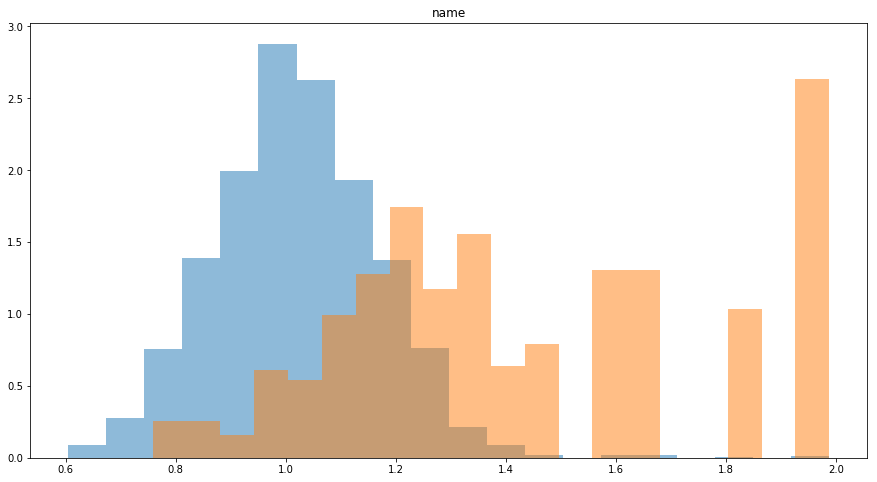

In [99]:
sig = original[original.signal == 1]
bkg = original[original.signal == 0]

fig, ax = plt.subplots(1, figsize=(15, 8))
ax.hist(bkg.grid_value, alpha=0.5, bins=20, normed=True)
ax.hist(sig.grid_value, alpha=0.5, bins=20, normed=True)
ax.set_title('name')
#ax.set_yscale('log')
plt.show()
fig.savefig('name.pdf')

In [96]:
a = ['2', 'dva', 2, 4.6]
a

['2', 'dva', 2, 4.6]

In [97]:
for item in a:
    print item

2
dva
2
4.6
